# DBSCAN analysis

In [62]:
from sklearn.metrics import *
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read dataset
df_01_scaled = pd.read_csv('data/HR_comma_sep_01_scaled.csv', index_col=0)

### Choice of attributes

In [4]:
# choice of attributes
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
train_data = df_01_scaled[numerical_features].values

### Choice of epsilon and MinPoints

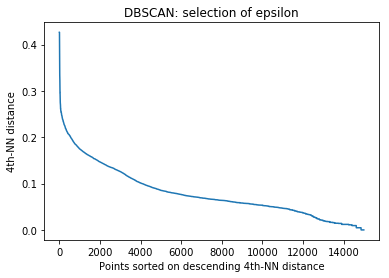

In [21]:
# choice of epsilon plotting the k-nearest neighbors distance for each point
k=4 # according to dbscan paper
knn = NearestNeighbors(n_neighbors=k, metric='euclidean')
knn.fit(train_data)
dist, ind = knn.kneighbors()
sorted_k_dist = sorted(dist[:,k-1], reverse=True)
plt.plot(range(0, len(sorted_k_dist)), sorted_k_dist)
plt.ylabel('%dth-NN distance' % k)
plt.xlabel('Points sorted on descending %dth-NN distance' % k)
plt.title('DBSCAN: selection of epsilon')
plt.savefig('images/dbscan_epsilon_selection.png')
plt.show()

In [72]:
# find the "elbow point"

# abs max diff method
diffs = [0] * len(sorted_k_dist)
for i in range(1, len(sorted_k_dist)-2):
    diffs[i] = abs(sorted_k_dist[i] - sorted_k_dist[i-1])
top_diff_indeces = (-np.array(diffs)).argsort()[:10]
print 'top 5 diffs args:', top_diff_indeces

# least distance from origin method
# 1. scale the x and y coordinates to the same scale
# 2. compute the norm of each vector [x,y] (i.e. distance from origin)
# it works because scaling both x and y does not change the shape of the graph
scaler_x, scaler_y = MinMaxScaler(), MinMaxScaler()
xs = scaler_x.fit_transform([i for i in range(len(sorted_k_dist))])
ys = scaler_y.fit_transform(sorted_k_dist)

#plt.plot(xs, ys)
#plt.show()

distances_from_origin = [np.linalg.norm([x,y]) for x,y in zip(xs,ys)]
argmin_distances = np.argmin(distances_from_origin)
print 'elbow point: (%d,%f)' % (argmin_distances, sorted_k_dist[argmin_distances])
# points on the left of the threshold are noise points

top 5 diffs args: [ 8  6  4 23 10 33 27 14 15 21]


/home/carlo/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/carlo/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/carlo/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your 

elbow point: (3510,0.111975)


In [74]:
# DBSCAN
epsilon = sorted_k_dist[argmin_distances]
print 'epsilon:', epsilon
dbscan = DBSCAN(eps=epsilon, min_samples=k+1, metric='euclidean')
dbscan.fit(train_data)
hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_))))

print 'labels', dict(zip(bins, hist))
#print 'silhouette', silhouette_score(train_data, dbscan.labels_)

epsilon: 0.111974810916
labels {0: 1638, 1: 113, 2: 207, 3: 425, 4: 551, 5: 265, 6: 83, 7: 415, 8: 61, 9: 5, 10: 54, 11: 1717, 12: 11, 13: 504, 14: 1086, 15: 29, 16: 469, 17: 5, 18: 7, 19: 10, 20: 14, 21: 1209, 22: 5, 23: 774, 24: 11, 25: 5, 26: 1730, 27: 123, 28: 25, 29: 6, 30: 22, 31: 42, 32: 9, 33: 5, 34: 38, 35: 33, 36: 40, 37: 12, 38: 7, 39: 5, 40: 5, 41: 6, 42: 11, 43: 5, 44: 10, 45: 5, 46: 11, 47: 10, 48: 14, 49: 5, 50: 10, 51: 22, 52: 10, 53: 6, 54: 8, 55: 6, 56: 5, 57: 5, 58: 19, 59: 5, 60: 6, 61: 6, 62: 7, 63: 6, 64: 5, 65: 5, 66: 5, 67: 7, 68: 5, 69: 5, 70: 8, 71: 8, 72: 5, 73: 10, 74: 1, 75: 5, 76: 5, 77: 7, 78: 5, 79: 5, 80: 6, 81: 6, 82: 5, 83: 6, 84: 3, 85: 5, 86: 5, 87: 5, 88: 5, 89: 6, 90: 6, 91: 6, 92: 5, 93: 8, 94: 5, 95: 6, 96: 6, 97: 5, 98: 5, 99: 5, -1: 2826}
